<a href="https://colab.research.google.com/github/traviz2560/BIN-PCKING-2D/blob/main/BIN_PACKING_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LIBRERIAS

In [ ]:
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import matplotlib.patheffects as patheffects

# GENERANDO LA DATA

In [ ]:
#@title Clases
class RectangleBin():
  def __init__(self, x, y ,w, h, rot = False, color = np.random.rand(3,)):
    self.x = x
    self.y = y
    self.w = w
    self.h = h
    self.r = rot
    self.color = color
    self.x2 = self.x+self.w
    self.y2 = self.y+self.h
    self.calcParams()

  def rotate(self):
    h = self.h
    w = self.w
    self.setWH(h,w)
  
  def moveXY(self,x2,y2):
    self.x2 = x2
    self.y2 = y2
    self.x = self.x2-self.w
    self.y = self.y2-self.h
    self.calcParams()
  
  def flipX(self,dir):
    if dir == 0:
      self.setCoords(self.x-self.w,self.y)
    else:
      self.moveXY(self.x2+self.w,self.y2)
  
  def flipY(self,dir):
    if dir == 0:
      self.setCoords(self.x,self.y-self.h)
    else:
      self.moveXY(self.x2,self.y2+self.h)
    
  def calcParams(self):
    self.xc = self.x+self.w/2
    self.yc = self.y+self.h/2
    self.A = self.w*self.h

  def setCoords(self,x,y):
    self.x,self.y = x,y
    self.x2 = self.x+self.w
    self.y2 = self.y+self.h
    self.calcParams()
    
  def setWH(self,w,h):
    self.w,self.h = w,h
    self.x2 = self.x+self.w
    self.y2 = self.y+self.h
    self.calcParams()
  
  def setCenter(self,xc,yc):
    self.xc = xc
    self.yc = yc
    self.x = self.xc-self.w/2
    self.x2 = self.xc+self.w/2 
    self.y = self.yc-self.h/2
    self.y2 = self.yc+self.h/2
  
  def setXY(self,x2,y2):
    self.x2 = x2
    self.y2 = y2
    self.w = x2-self.x
    self.h = y2-self.y
    self.calcParams()
 
  def setColor(self,color):
    self.color = color

  def getWH(self):
    return self.x,self.y,self.w,self.h

  def getXY(self):
    return self.x,self.y,self.x2,self.y2

  def getArea(self):
    return self.A

  def getCenter(self):
    return self.xc,self.yc
  
  def getCoords(self):
    return self.x,self.y
  
  def getColor(self):
    return self.color

class PackedBin(RectangleBin):
  def __init__(self, x, y ,w, h, rot = False):
    RectangleBin.__init__(self, x, y ,w, h, rot, color = np.random.rand(3,))

class Container(RectangleBin):
  def __init__(self,h):
    RectangleBin.__init__(self,0,0,0,h)
    self.listBins = []

  def addBin(self,bin):
    self.listBins.append(bin)
    self.calc()
  
  def addListBins(self,listBins):
    self.listBins += listBins
    self.calc()
  
  def getListBins(self):
    listbins = []
    for bin in self.listBins:
      bin2 = PackedBin(*bin.getWH(),bin.r)
      bin2.setColor(bin.color)
      listbins.append(bin2)
    return listbins.copy()
  
  def setListBins(self,listBins):
    self.listBins = listBins
    self.calc()

  def popListBins(self,n=-1):
    self.listBins.pop(n)
  
  def ScoreArea(self):
    Atotal = self.getArea()
    Abins = 0
    for bin in self.listBins:
      Abins += bin.getArea()
    
    score = Atotal-Abins
    if Atotal != 0:
      percent = round(Abins/Atotal*100,2)
    else:
      percent = 0

    return score,percent
  
  def calc(self):
    xList = []

    for bin in self.listBins:
      x1,y1,x2,y2 = bin.getXY()
      xList += [x1,x2]

    xmax = max(xList)

    self.setWH(xmax,self.h)

  def limits(self,bin):
    b1 = bin
    if b1.y2 > self.y2:
      b1.moveXY(b1.x2,self.y2)
    if b1.y < self.y:
      b1.setCoords(b1.x,self.y)
    if b1.x < self.x:
      b1.setCoords(self.x,b1.y)

  def CorrectCollision(self):
    total = len(self.listBins)

    xcoord = []
    for bin in self.listBins:
      xcoord.append(bin.x)
    
    xindex = [x for _,x in sorted(zip(xcoord,list(range(total))))]

    for i in xindex:
      for j in xindex:
        if i != j:
          b1 = self.listBins[i]
          b2 = self.listBins[j]

          collision = b1.x < b2.x2 and b1.x2 > b2.x and b1.y < b2.y2 and b1.y2 > b2.y
          if collision:
            if abs(b2.xc-b1.xc)<abs(b2.yc-b1.yc) and b1.y2+b2.h < self.y2:
              b2.setCoords(b2.x,b1.y2)
            else:
              b2.setCoords(b1.x2,b2.y)
              

  
  def actions(self, n1, n2, rot1,rot2):
    #dir : direciones a mover (0,1,2,3) arriba abajo der izq
    #rot : rotar(0,1)

    b1 = self.listBins[n1]
    b2 = self.listBins[n2]

    if rot1 == 1:
      b1.rotate()
    
    if rot2 == 1:
      b2.rotate()
    
    xc1,yc1 = b1.getCenter()
    xc2,yc2 = b2.getCenter()

    b1.setCenter(xc2,yc2)
    b2.setCenter(xc1,yc1) 

    gx = 20
    gy = 20

    for i in range(5):
      for bin in self.listBins:
        bin.setCoords(bin.x-gx,bin.y-gy)
        self.limits(bin)
    self.CorrectCollision()
    self.CorrectCollision()
    self.calc()
  
  def plotBins(self):
    fig = plt.figure(dpi = 150)
    ax = fig.add_subplot(111)
    ax.clear()
    self.calc()

    score, perc = self.ScoreArea()
    ax.set_title(f"SCORE:  [{score}]   USED SPACE:  [{perc}%]    WASTED SPACE: [{100-perc}%]",fontsize = 5)

    n=1
    for bin in self.listBins:
      x,y,w,h = bin.getWH()
      xc,yc = bin.getCenter()

      r = Rectangle((x, y), w, h, color = bin.getColor())
      ax.add_patch(r)
      ax.text(xc,yc,"U#"+str(n),horizontalalignment='center',verticalalignment="center",fontsize = 4,
              path_effects=[patheffects.withStroke(linewidth=2, foreground='white', capstyle="round")])
      n += 1

    plt.xlim([self.x, self.x2])
    plt.ylim([self.y, self.y2])
    plt.axis('scaled')
    plt.show()


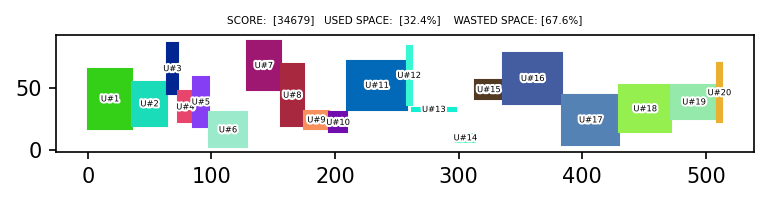

In [ ]:
#@title

num_rectangles = 20 #@param {type:"integer"}
max_height = 50 #@param {type:"integer"}
max_width = 50 #@param {type:"integer"}
container_height = 100 #@param {type:"integer"}
rotatable = True #@param {type:"boolean"}

x = 0
cont = Container(container_height)
for _ in range(num_rectangles):
  height = random.randint(1,max_height)
  width = random.randint(1,max_width)
  y = random.randint(1,max_width)
  rect = PackedBin(x,y,width,height,rotatable)
  x +=  width
  cont.addBin(rect)

cont.plotBins()

#BUSQUEDA TABU

In [ ]:
def tabu_search(n_iter, container):
  t_wait  = 3
  c_aspi  = 5
  top     = 4
  n_chang = 6  
  sol_ini = container.getListBins()

  _,_,_,h = container.getWH()
  cont = Container(h)
  cont.addListBins(sol_ini)

  mat_tabu = np.zeros((len(sol_ini), len(sol_ini)))

  best_score,_ = cont.ScoreArea()
  bestcont = cont

  for _ in range(n_iter):
      lst_sol = []

      for _ in range(n_chang):
        n1, n2 = np.random.randint(len(sol_ini), size = [2])
        rot1 = np.random.randint(2)
        rot2 = np.random.randint(2)
        cont.actions(n1,n2,rot1,rot2)
        score,_ = cont.ScoreArea()
        sol = cont.getListBins()
        lst_sol.append((score,sol,(n1,n2)))

      #lst_sol.sort(key = lambda x: x[0])
      lst_sol = lst_sol[::-1] 

      for i in range(top):
        n1,n2 = lst_sol[i][2]
        if mat_tabu[n1, n2] == 0:
          mat_tabu[n1, n2] = t_wait
          mat_tabu[n2, n1] += 1
          break
        else:
          if lst_sol[i][0] - lst_sol[i+1][0] >= c_aspi:
            mat_tabu[n1, n2] = 0
            mat_tabu[n2, n1] += 1
            break
      
      if lst_sol[i][0]<best_score:
        best_score = lst_sol[i][0]
        bestcont = Container(h)
        bestcont.addListBins(lst_sol[i][1])
  return best_score, bestcont

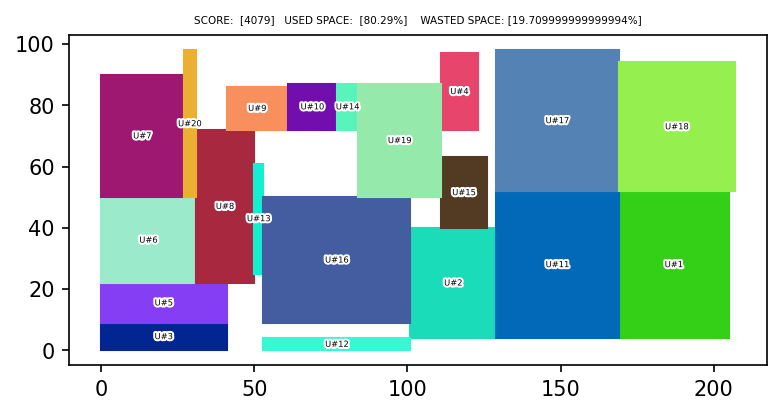

In [ ]:
score, cont3 = tabu_search(300,cont)
cont3.plotBins()